In [1]:
import itertools
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict

In [2]:
# import the fitted model, make predictions, and conduct error analysis on the wrong predictions
model = joblib.load('../models/logistic-regression-tuned.joblib')

test = pd.read_csv('../data/final/test.csv')
X = test.drop(labels=['w2v_feat', 'target', 'review_text'], axis=1)
y = test['target']

# make predictions
y_pred = model.predict(X)

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 fontsize=12,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

Classification Report : Logistic Regression (TFIDF)

-------------------------------------
                 precision    recall  f1-score   support

    recommended       0.95      0.86      0.90      5546
not-recommended       0.56      0.82      0.67      1247

       accuracy                           0.85      6793
      macro avg       0.76      0.84      0.78      6793
   weighted avg       0.88      0.85      0.86      6793

Confusion Matrix : Logistic Regression (TFIDF)

-------------------------------------


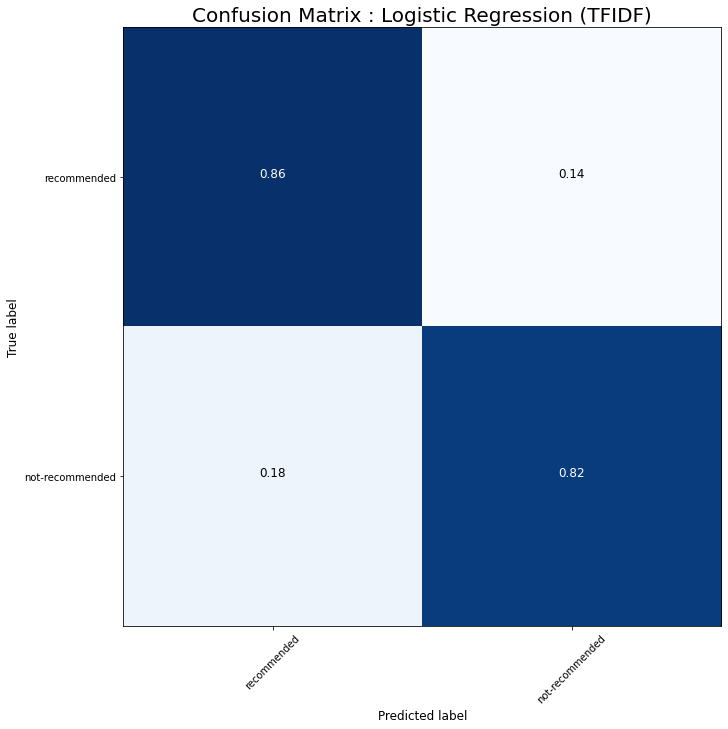

In [4]:
# print classification reports
TARGETS = ['recommended', 'not-recommended']

y_pred = cross_val_predict(model, X, y)
print(f'Classification Report : Logistic Regression (TFIDF)\n')
print('-------------------------------------')
print(classification_report(y, y_pred, target_names=TARGETS))

# print confusion matrices
print(f'Confusion Matrix : Logistic Regression (TFIDF)\n')
print('-------------------------------------')
plot_confusion_matrix(confusion_matrix(y, y_pred), classes=['recommended','not-recommended'], normalize=True, title=f'Confusion Matrix : Logistic Regression (TFIDF)')
plt.grid(False)
plt.savefig(f'../assets/final_{"Logistic Regression (TFIDF)".lower()}.png')
plt.show()